In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
#dataset of images with digits
mnist = tf.keras.datasets.mnist
mnistData= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Split into train and test
(X_train, y_train), (X_test, y_test) = mnistData

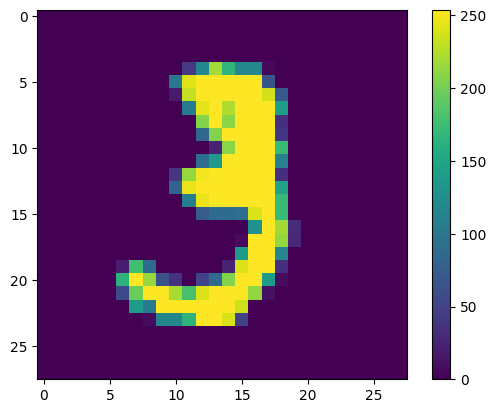

In [ ]:
#Vizualize the first image on the training set
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.show()

In [ ]:
#Preprocess data
#imges 28x28 np arrays, wil pixel values ranging from 0 to 255
#Rescaling these to be between 0 and 1 (dividing by 255)
X_train, X_test = X_train/255, X_test/255


In [ ]:
#model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
#model compilation
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6943 - accuracy: 0.8241 - val_loss: 0.3594 - val_accuracy: 0.9040
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3689 - accuracy: 0.8960 - val_loss: 0.2925 - val_accuracy: 0.9197
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3109 - accuracy: 0.9123 - val_loss: 0.2629 - val_accuracy: 0.9266
Epoch 4/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2779 - accuracy: 0.9222 - val_loss: 0.2379 - val_accuracy: 0.9341
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2512 - accuracy: 0.9294 - val_loss: 0.2177 - val_accuracy: 0.9399


In [ ]:
# Evaluate the model
# Checking how the model perfoms on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2175 - accuracy: 0.9392
Test accuracy: 0.9391999840736389


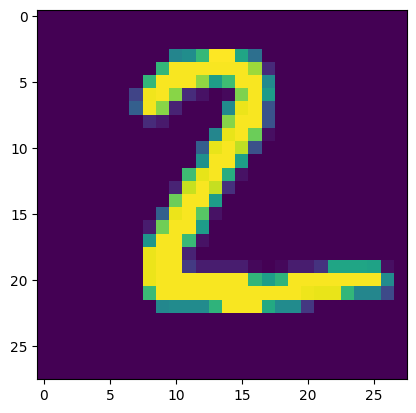

In [ ]:
# Pick and Visualize a single test image from test data
single_test_image = X_test[1]
single_test_image = np.array(single_test_image, dtype= 'float')
plt.imshow(single_test_image)
plt.show()

In [ ]:
# Predict the test data using the model
single_test_image = (np.expand_dims(single_test_image,0))
pred = model.predict (single_test_image)
digit_value = np.argmax(pred[0])
digit_value

1/1 [==============================] - 0s 106ms/step


2

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
